In [1]:
from emle.models import EMLE
from emle_bespoke.patching import EMLEPatched
from emle_bespoke._constants import HARTREE_TO_KJ_MOL
import pickle as pkl
import torch
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from math import sqrt

/home/joaomorado/opt/micromamba/envs/emle-bespoke/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indi

<>:139: SyntaxWarning: invalid escape sequence '\m'
<>:140: SyntaxWarning: invalid escape sequence '\m'
<>:156: SyntaxWarning: invalid escape sequence '\m'
<>:157: SyntaxWarning: invalid escape sequence '\m'
<>:177: SyntaxWarning: invalid escape sequence '\m'
<>:178: SyntaxWarning: invalid escape sequence '\m'
<>:139: SyntaxWarning: invalid escape sequence '\m'
<>:140: SyntaxWarning: invalid escape sequence '\m'
<>:156: SyntaxWarning: invalid escape sequence '\m'
<>:157: SyntaxWarning: invalid escape sequence '\m'
<>:177: SyntaxWarning: invalid escape sequence '\m'
<>:178: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2355956/452930975.py:139: SyntaxWarning: invalid escape sequence '\m'
  axes[idx, 0].set_xlabel("$E_{\mathrm{QM/MM}}$ / kJ.mol$^{-1}$")
/tmp/ipykernel_2355956/452930975.py:140: SyntaxWarning: invalid escape sequence '\m'
  axes[idx, 0].set_ylabel("$E_{\mathrm{EMLE}}$ / kJ.mol$^{-1}$")
/tmp/ipykernel_2355956/452930975.py:156: SyntaxWarning: invalid escape sequ

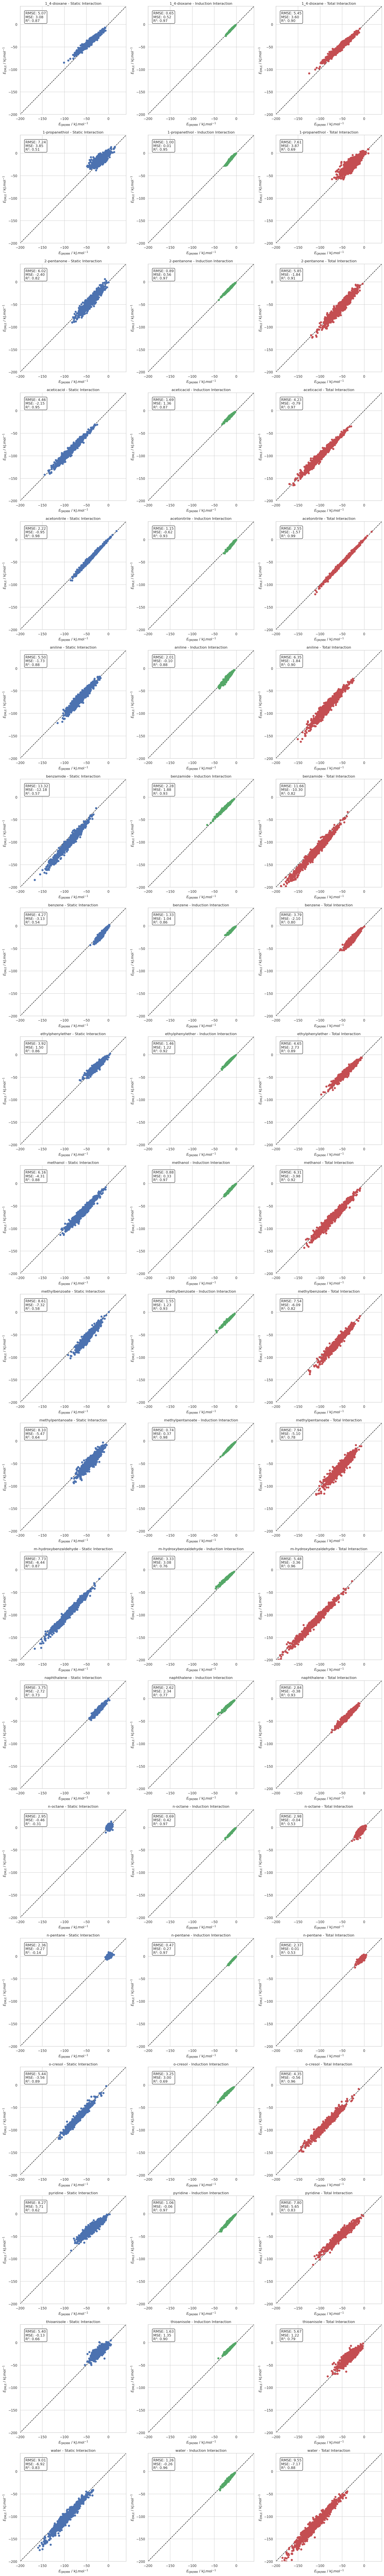

                      mol       rmse        mse
0             1_4-dioxane   5.452931   3.601175
1          1-propanethiol   7.607761   3.866146
2             2-pentanone   5.853747  -1.837965
3              aceticacid   4.234658  -0.786124
4            acetonitrile   2.551547  -1.568235
5                 aniline   6.348172  -1.835049
6               benzamide  11.662382 -10.303881
7                 benzene   3.791574  -2.095618
8        ethylphenylether   4.647397   2.726858
9                methanol   6.309711  -3.980315
10         methylbenzoate   7.542069  -6.090386
11       methylpentanoate   7.936051  -5.096591
12  m-hydroxybenzaldehyde   5.476675  -3.356243
13            naphthalene   2.835122  -0.382774
14               n-octane   2.980091  -0.038096
15              n-pentane   2.367473   0.009094
16               o-cresol   4.347993  -0.561880
17               pyridine   7.802071   5.650201
18            thioanisole   5.668435   1.224911
19                  water   9.552569  -7

<Figure size 640x480 with 0 Axes>

                      mol       rmse       mse
0             1_4-dioxane   5.317655  3.333391
1          1-propanethiol   7.728944  4.123852
2             2-pentanone   6.591895 -3.245357
3              aceticacid   4.498990 -1.417780
4            acetonitrile   1.775220 -0.173031
5                 aniline   6.257524 -1.776144
6               benzamide  11.274071 -9.905909
7                 benzene   3.949266 -2.499712
8        ethylphenylether   4.279353  2.218411
9                methanol   6.046245 -3.671045
10         methylbenzoate   7.958189 -6.476897
11       methylpentanoate   8.237664 -5.501645
12  m-hydroxybenzaldehyde   6.552633 -4.804935
13            naphthalene   3.544720 -2.105791
14               n-octane   3.084783 -0.779698
15              n-pentane   2.469902 -0.436747
16               o-cresol   4.625213 -1.847129
17               pyridine   8.400952  6.094525
18            thioanisole   5.659777  0.596808
19                  water   8.987704 -6.496773


<Figure size 640x480 with 0 Axes>

                      mol       rmse       mse
0             1_4-dioxane   5.174256  3.228522
1          1-propanethiol   7.682772  3.989450
2             2-pentanone   5.469954 -2.037053
3              aceticacid   4.140730 -1.027909
4            acetonitrile   2.272355 -1.224405
5                 aniline   5.272661 -0.460312
6               benzamide  10.261821 -8.453756
7                 benzene   4.161559 -2.614460
8        ethylphenylether   4.098158  1.505541
9                methanol   6.425448 -4.135731
10         methylbenzoate   7.373260 -5.890699
11       methylpentanoate   7.816214 -5.211178
12  m-hydroxybenzaldehyde   6.392263 -4.410231
13            naphthalene   3.082490 -1.293425
14               n-octane   2.935956 -0.066552
15              n-pentane   2.298777 -0.010263
16               o-cresol   4.152942 -0.254147
17               pyridine   6.621715  4.011668
18            thioanisole   5.344838  0.921809
19                  water  11.377225 -9.507134


<Figure size 640x480 with 0 Axes>

                      mol       rmse       mse
0             1_4-dioxane   5.056153  2.945717
1          1-propanethiol   7.800065  4.212487
2             2-pentanone   6.347955 -3.530477
3              aceticacid   4.603581 -2.005415
4            acetonitrile   1.696582 -0.008419
5                 aniline   5.198977 -0.189546
6               benzamide   9.969788 -8.101560
7                 benzene   4.350270 -3.007908
8        ethylphenylether   3.935242  1.051453
9                methanol   6.119402 -3.769215
10         methylbenzoate   7.888995 -6.376661
11       methylpentanoate   8.331376 -5.887972
12  m-hydroxybenzaldehyde   7.641536 -6.010532
13            naphthalene   4.150262 -2.980900
14               n-octane   3.044268 -0.787600
15              n-pentane   2.387057 -0.413646
16               o-cresol   4.347597 -1.677110
17               pyridine   7.337500  4.633621
18            thioanisole   5.353102  0.296274
19                  water  10.662493 -8.718792


<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  3.646215  0.006597
1          1-propanethiol  6.973549  1.312269
2             2-pentanone  3.797676  0.109606
3              aceticacid  3.803096 -0.383023
4            acetonitrile  1.629732  0.034558
5                 aniline  5.008302  0.472697
6               benzamide  4.939630  0.943286
7                 benzene  3.680786 -2.049937
8        ethylphenylether  3.744017  1.381187
9                methanol  4.362797 -1.369786
10         methylbenzoate  4.020960 -0.841241
11       methylpentanoate  4.245823 -1.330362
12  m-hydroxybenzaldehyde  3.954935  0.456383
13            naphthalene  2.828248  1.068829
14               n-octane  2.959165 -0.906235
15              n-pentane  2.316619 -0.578230
16               o-cresol  3.780443  1.376421
17               pyridine  5.304803  0.873492
18            thioanisole  5.153528  0.619669
19                  water  5.454590 -2.384499


<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  3.907547  1.287403
1          1-propanethiol  7.104344  2.667277
2             2-pentanone  3.683600  0.915001
3              aceticacid  3.837504  0.467042
4            acetonitrile  1.983265 -0.787067
5                 aniline  4.974573  0.310654
6               benzamide  5.113755  1.531618
7                 benzene  3.300976 -1.476829
8        ethylphenylether  3.899206  1.954887
9                methanol  4.295748 -0.103892
10         methylbenzoate  3.892163 -0.044314
11       methylpentanoate  3.906056 -0.215991
12  m-hydroxybenzaldehyde  4.530178  1.959666
13            naphthalene  3.022238  1.537311
14               n-octane  2.811781 -0.325019
15              n-pentane  2.174725 -0.171519
16               o-cresol  4.596310  2.653752
17               pyridine  5.428468  2.136056
18            thioanisole  5.301316  1.632880
19                  water  4.901444 -1.041273


<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  3.755375  0.812758
1          1-propanethiol  7.129487  2.880174
2             2-pentanone  3.603080  0.663840
3              aceticacid  3.585105 -0.453464
4            acetonitrile  1.703880  0.072799
5                 aniline  4.880998  1.239517
6               benzamide  4.804357  0.267337
7                 benzene  3.601229 -2.112418
8        ethylphenylether  3.545065  1.226791
9                methanol  4.116742 -0.166931
10         methylbenzoate  3.908214 -0.933251
11       methylpentanoate  3.835543 -0.370632
12  m-hydroxybenzaldehyde  3.994395 -0.454212
13            naphthalene  2.492050 -0.064251
14               n-octane  2.766823 -0.506065
15              n-pentane  2.197248 -0.323659
16               o-cresol  3.700413  0.828970
17               pyridine  5.899224  2.460088
18            thioanisole  5.094859  0.809224
19                  water  4.450095 -0.355567


<Figure size 640x480 with 0 Axes>

                      mol       rmse        mse
0             1_4-dioxane   5.497097   3.802753
1          1-propanethiol   6.784320   0.946957
2             2-pentanone   7.518634  -4.770997
3              aceticacid   5.675277  -3.135693
4            acetonitrile   3.605458  -2.842790
5                 aniline   6.833768  -3.949634
6               benzamide  13.988137 -12.368104
7                 benzene   3.104642  -1.472705
8        ethylphenylether   4.506290   2.060357
9                methanol   8.743184  -6.754165
10         methylbenzoate   7.925638  -6.484572
11       methylpentanoate   9.879107  -7.282617
12  m-hydroxybenzaldehyde   7.370459  -5.413910
13            naphthalene   3.272835   0.317804
14               n-octane   3.926112  -1.656754
15              n-pentane   3.168905  -0.956162
16               o-cresol   4.750355  -0.281870
17               pyridine   6.066812   2.430919
18            thioanisole   5.404975   1.700129
19                  water  10.725534  -9

<Figure size 640x480 with 0 Axes>

                      mol       rmse        mse
0             1_4-dioxane   5.373216   3.583597
1          1-propanethiol   6.782565   1.335349
2             2-pentanone   8.952889  -6.545895
3              aceticacid   5.646389  -3.154574
4            acetonitrile   2.086316   0.029909
5                 aniline   6.718248  -3.809259
6               benzamide  13.269821 -11.715618
7                 benzene   3.256588  -1.915717
8        ethylphenylether   4.228938   1.511553
9                methanol   8.301796  -6.255881
10         methylbenzoate   8.272675  -6.792288
11       methylpentanoate  10.441004  -7.764670
12  m-hydroxybenzaldehyde   9.312241  -7.740883
13            naphthalene   3.477057  -1.201600
14               n-octane   4.545884  -2.540197
15              n-pentane   3.471377  -1.425337
16               o-cresol   5.267738  -2.128801
17               pyridine   6.575736   2.748883
18            thioanisole   5.419005   1.046156
19                  water   9.687498  -8

<Figure size 640x480 with 0 Axes>

                      mol       rmse        mse
0             1_4-dioxane   5.163734   3.409775
1          1-propanethiol   6.813177   1.236042
2             2-pentanone   7.039159  -4.551049
3              aceticacid  14.440923 -13.430663
4            acetonitrile   3.112925  -2.321223
5                 aniline   5.057965  -0.787644
6               benzamide  12.379394 -10.266256
7                 benzene   3.436724  -1.989431
8        ethylphenylether   4.337156   1.024331
9                methanol   8.832604  -6.790169
10         methylbenzoate   7.230269  -5.776156
11       methylpentanoate   9.565334  -6.972148
12  m-hydroxybenzaldehyde   8.356163  -6.344872
13            naphthalene   3.263163  -0.155075
14               n-octane   3.944726  -1.789167
15              n-pentane   3.016914  -0.944861
16               o-cresol   4.727896  -0.013851
17               pyridine   5.370921   0.210037
18            thioanisole   5.003940   1.272764
19                  water  13.686480 -12

<Figure size 640x480 with 0 Axes>

                      mol       rmse        mse
0             1_4-dioxane   5.033365   3.163895
1          1-propanethiol   6.850717   1.616993
2             2-pentanone   8.597737  -6.416146
3              aceticacid  17.169314 -16.119417
4            acetonitrile   1.927946   0.113076
5                 aniline   4.948854  -0.324071
6               benzamide  11.699517  -9.635196
7                 benzene   3.644562  -2.414528
8        ethylphenylether   4.297550   0.523176
9                methanol   8.289857  -6.181765
10         methylbenzoate   7.678995  -6.212150
11       methylpentanoate  10.458341  -7.869837
12  m-hydroxybenzaldehyde  10.597095  -8.995622
13            naphthalene   3.691258  -1.633911
14               n-octane   4.517166  -2.637137
15              n-pentane   3.307317  -1.386699
16               o-cresol   5.170954  -2.201815
17               pyridine   5.870864   0.687513
18            thioanisole   5.072769   0.611291
19                  water  12.417945 -11

<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  3.680697 -0.920395
1          1-propanethiol  8.672779 -3.665404
2             2-pentanone  4.655243 -1.933784
3              aceticacid  4.388895 -0.599741
4            acetonitrile  1.756909 -0.064326
5                 aniline  4.827020 -1.148217
6               benzamide  5.557484 -1.391862
7                 benzene  3.025009 -1.520212
8        ethylphenylether  3.851480  0.698213
9                methanol  6.158855 -4.088205
10         methylbenzoate  4.193404 -1.663972
11       methylpentanoate  5.819559 -3.430186
12  m-hydroxybenzaldehyde  4.786800 -1.184519
13            naphthalene  3.177211  1.106522
14               n-octane  4.321111 -2.713948
15              n-pentane  3.357991 -1.553909
16               o-cresol  3.822917  0.925605
17               pyridine  6.141759 -3.340528
18            thioanisole  4.311011  0.445353
19                  water  7.062154 -5.405624


<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  3.597960  0.782886
1          1-propanethiol  6.371754 -0.313869
2             2-pentanone  3.880939 -0.274332
3              aceticacid  3.978199  0.693205
4            acetonitrile  2.806835 -1.912342
5                 aniline  4.735181 -0.743842
6               benzamide  5.375341  0.009859
7                 benzene  2.684194 -0.891036
8        ethylphenylether  4.013570  1.325275
9                methanol  4.974020 -1.476881
10         methylbenzoate  3.594025 -0.392783
11       methylpentanoate  4.627219 -1.237134
12  m-hydroxybenzaldehyde  4.903664  1.873086
13            naphthalene  3.551981  1.866968
14               n-octane  3.717412 -1.882700
15              n-pentane  2.865204 -0.955772
16               o-cresol  4.574108  2.681889
17               pyridine  5.141805 -1.631047
18            thioanisole  4.292956  1.389345
19                  water  5.362855 -3.322361


<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  3.450420  0.251297
1          1-propanethiol  6.131097  0.032694
2             2-pentanone  3.868356 -0.616548
3              aceticacid  3.460862 -0.588985
4            acetonitrile  1.754503  0.170829
5                 aniline  4.361861  0.631741
6               benzamide  5.057237 -1.296477
7                 benzene  2.961428 -1.586197
8        ethylphenylether  3.751092  0.487914
9                methanol  4.774961 -1.542609
10         methylbenzoate  3.645116 -1.299278
11       methylpentanoate  4.730835 -1.364910
12  m-hydroxybenzaldehyde  4.464125 -1.295069
13            naphthalene  2.907982  0.342750
14               n-octane  3.925786 -2.151613
15              n-pentane  3.022810 -1.154131
16               o-cresol  3.548999  0.231822
17               pyridine  5.465121 -1.488776
18            thioanisole  4.182470  0.510877
19                  water  4.371581 -2.337217


<Figure size 640x480 with 0 Axes>

                      mol       rmse        mse
0             1_4-dioxane   5.734709   1.698751
1          1-propanethiol   5.732735   1.244057
2             2-pentanone   6.369489  -3.222046
3              aceticacid   5.778252  -3.031283
4            acetonitrile   3.969612  -2.877797
5                 aniline   6.063642  -2.607025
6               benzamide  15.254071 -13.199278
7                 benzene   3.206068  -1.482641
8        ethylphenylether   4.550665   1.835806
9                methanol   8.474506  -6.008231
10         methylbenzoate   8.309572  -6.570625
11       methylpentanoate  10.483311  -8.058263
12  m-hydroxybenzaldehyde   7.600304  -5.499044
13            naphthalene   2.952115   0.649159
14               n-octane   3.335065  -1.562716
15              n-pentane   2.660186  -0.275906
16               o-cresol   5.023838  -0.675066
17               pyridine   6.029343   1.581142
18            thioanisole   5.146181   1.175753
19                  water  10.930341  -8

<Figure size 640x480 with 0 Axes>

                      mol       rmse        mse
0             1_4-dioxane   5.672022   1.717219
1          1-propanethiol   5.777551   1.456734
2             2-pentanone   7.515972  -4.884130
3              aceticacid   6.426364  -4.162102
4            acetonitrile   2.519421  -0.073105
5                 aniline   5.966530  -2.534877
6               benzamide  14.105171 -12.165692
7                 benzene   3.365442  -1.943205
8        ethylphenylether   4.270791   1.411545
9                methanol   8.108771  -5.594752
10         methylbenzoate   8.591836  -6.882053
11       methylpentanoate  10.923039  -8.512540
12  m-hydroxybenzaldehyde   9.560154  -7.820776
13            naphthalene   3.032372  -0.784587
14               n-octane   3.790456  -2.275107
15              n-pentane   2.874778  -0.758090
16               o-cresol   5.293158  -2.220678
17               pyridine   6.352632   1.698494
18            thioanisole   5.084650   0.719274
19                  water  10.038342  -7

<Figure size 640x480 with 0 Axes>

                      mol       rmse        mse
0             1_4-dioxane   5.956464  -0.251810
1          1-propanethiol   5.578418   1.332747
2             2-pentanone   6.117336  -3.349179
3              aceticacid   5.664559  -3.305420
4            acetonitrile   3.549344  -2.434108
5                 aniline   4.841651  -0.435568
6               benzamide  13.784924 -10.932444
7                 benzene   3.631767  -2.047195
8        ethylphenylether   4.294069   0.604888
9                methanol   9.111120  -6.737589
10         methylbenzoate   8.189195  -6.578203
11       methylpentanoate  10.020723  -7.684860
12  m-hydroxybenzaldehyde   9.488810  -7.301087
13            naphthalene   2.864377  -0.053966
14               n-octane   3.214920  -1.580867
15              n-pentane   2.628886  -0.267152
16               o-cresol   4.750998  -0.795660
17               pyridine   5.713004  -0.754245
18            thioanisole   4.966910   0.851705
19                  water  13.765510 -11

<Figure size 640x480 with 0 Axes>

                      mol       rmse        mse
0             1_4-dioxane   5.889655  -0.146241
1          1-propanethiol   5.625666   1.514380
2             2-pentanone   7.456940  -5.189246
3              aceticacid   6.680465  -4.844430
4            acetonitrile   2.367675  -0.068319
5                 aniline   4.734401  -0.121052
6               benzamide  12.744689  -9.954272
7                 benzene   3.838419  -2.491259
8        ethylphenylether   4.193823   0.314408
9                methanol   8.655226  -6.222998
10         methylbenzoate   8.583220  -6.995914
11       methylpentanoate  10.674918  -8.410043
12  m-hydroxybenzaldehyde  11.621361  -9.911415
13            naphthalene   3.277950  -1.444018
14               n-octane   3.690647  -2.274709
15              n-pentane   2.801803  -0.703336
16               o-cresol   5.118912  -2.649526
17               pyridine   6.010517  -0.508723
18            thioanisole   4.924035   0.399908
19                  water  12.631901 -10

<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  5.014894 -1.674373
1          1-propanethiol  6.223618 -1.703336
2             2-pentanone  4.511772 -0.604126
3              aceticacid  5.033052 -2.425845
4            acetonitrile  2.314422 -0.312461
5                 aniline  4.551537  0.101118
6               benzamide  6.157709 -0.734287
7                 benzene  3.067568 -1.533754
8        ethylphenylether  3.876742  0.433809
9                methanol  5.521846 -2.332377
10         methylbenzoate  4.897077 -1.907683
11       methylpentanoate  5.637248 -3.662749
12  m-hydroxybenzaldehyde  4.701885 -0.809705
13            naphthalene  3.051723  1.433622
14               n-octane  3.670867 -2.470904
15              n-pentane  2.698134 -0.969441
16               o-cresol  3.920961  0.912404
17               pyridine  6.683691 -3.979134
18            thioanisole  4.936954  0.283986
19                  water  7.224740 -4.208487


<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  5.240919 -0.837357
1          1-propanethiol  5.649865 -0.389742
2             2-pentanone  3.880708  0.244470
3              aceticacid  4.796136 -1.388383
4            acetonitrile  3.261440 -2.132521
5                 aniline  4.787310  0.005584
6               benzamide  6.547981 -0.841409
7                 benzene  2.880693 -0.940870
8        ethylphenylether  3.837071  1.018056
9                methanol  5.416196 -0.979864
10         methylbenzoate  4.570654 -1.299561
11       methylpentanoate  4.790462 -2.145294
12  m-hydroxybenzaldehyde  5.518443  1.087480
13            naphthalene  3.263780  1.887946
14               n-octane  3.109839 -1.675453
15              n-pentane  2.497662 -0.409342
16               o-cresol  4.247722  1.962854
17               pyridine  5.816667 -2.647617
18            thioanisole  4.856561  1.106410
19                  water  5.809959 -2.314857


<Figure size 640x480 with 0 Axes>

                      mol      rmse       mse
0             1_4-dioxane  5.189404 -1.009242
1          1-propanethiol  5.562042 -0.326852
2             2-pentanone  3.822793 -0.105911
3              aceticacid  4.858945 -2.744130
4            acetonitrile  2.386020 -0.216738
5                 aniline  4.540140  1.068303
6               benzamide  6.226121 -1.776041
7                 benzene  3.159602 -1.661766
8        ethylphenylether  3.593335  0.357628
9                methanol  5.160460 -1.218886
10         methylbenzoate  4.737770 -2.204201
11       methylpentanoate  4.709099 -2.237883
12  m-hydroxybenzaldehyde  5.446934 -2.165880
13            naphthalene  2.587978  0.391298
14               n-octane  3.179748 -1.769380
15              n-pentane  2.547578 -0.563116
16               o-cresol  3.447215 -0.204012
17               pyridine  6.119358 -2.697675
18            thioanisole  4.695385  0.370710
19                  water  5.055137 -1.457518


In [3]:
sns.set(style="whitegrid")

mols = ["1_4-dioxane", 
        "1-propanethiol", 
        "2-pentanone", 
        "aceticacid", 
        "acetonitrile", 
        "aniline", 
        "benzamide",
        "benzene",
        "ethylphenylether",
        "methanol",
        "methylbenzoate",
        "methylpentanoate",
        "m-hydroxybenzaldehyde",
        "naphthalene",
        "n-octane",
        "n-pentane",
        "o-cresol",
        "pyridine",
        "thioanisole",
        "water"]



# Create the figure and axes for the subplots
num_mols = len(mols)
fig, axes = plt.subplots(num_mols, 3, figsize=(18, 6 * num_mols))

# Ensure axes is always a 2D array
axes = np.atleast_2d(axes)

# Define the x values for the plot (reference line)
x = np.linspace(-1000, 1000, 100)
y = x

# Function to compute RMSE, MSE, and R^2
def compute_metrics(true_values, predicted_values):
    mse = np.mean(predicted_values - true_values)
    rmse = np.sqrt(np.mean((predicted_values - true_values) ** 2))
    r2 = r2_score(true_values, predicted_values)
    return rmse, mse, r2

use_bespoke = True

# f"/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_electrostatic_iter_2_no_patching/sampling/{mol}/{mol}_ref_data.pkl",

pre_paths = {
    "iter_1": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/sampling",
    "iter_2": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training/sampling",
    "iter_3": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training2/sampling",   
}

models = {
    "bespoke1": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training/ligand_bespoke.mat",
    "bespoke2": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training2/ligand_bespoke.mat",
    "patched_species1": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training/ligand_bespoke_patched_species.mat",
    #"patched_reference1": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training/ligand_bespoke_patched_reference.mat",
    "patched_species2": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training2/ligand_bespoke_patched_species.mat",
    "patched_reference2": "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training2/ligand_bespoke_patched_reference.mat",
}

# Loop through each molecule
for pre_key, pre_value in pre_paths.items():
    for model_key, model_value in models.items():
        for alpha_mode in ["species", "reference"]:
            if "species" in model_key and alpha_mode == "reference":
                continue
            if "reference" in model_key and alpha_mode == "species":
                continue
            #pre = "/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/sampling"
            rmse_list = []
            mse_list = []
            for idx, mol in enumerate(mols):
                with open(
                    f"{pre_value}/{mol}/{mol}_ref_data.pkl",
                    "rb",
                ) as f:
                    data = pkl.load(f)

                # Load the MBIS data
                #alpha_mode = "reference"
                #model = f"/home/joaomorado/mnsol_sampling/run_fixed/ml_mm_mechanical_iter_1/training2/ligand_bespoke.mat"
                bespoke_model = (
                    model_value
                    if use_bespoke
                    else None
                )

                device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
                dtype = torch.float64
                alpha_static = 1.0
                beta_induced = 1.0
                emle_model = EMLEPatched(
                    device=device,
                    dtype=dtype,
                    model=bespoke_model,
                    alpha_static=alpha_static,
                    beta_induced=beta_induced,
                    method="electrostatic",
                    alpha_mode=alpha_mode,
                )

                # Calculate the predicted static and induction energies
                from emle.train._utils import pad_to_max

                z = pad_to_max(data["z"]).to(device=device, dtype=torch.int64)
                charges_mm = pad_to_max(data["charges_mm"]).to(device=device, dtype=dtype)
                xyz_qm = pad_to_max(data["xyz_qm"]).to(device=device, dtype=dtype)
                xyz_mm = pad_to_max(data["xyz_mm"]).to(device=device, dtype=dtype)
                e_static_emle, e_ind_emle = emle_model.forward(z, charges_mm, xyz_qm, xyz_mm)

                e_static_emle = e_static_emle * HARTREE_TO_KJ_MOL
                e_ind_emle = e_ind_emle * HARTREE_TO_KJ_MOL

                # Example data (replace with your actual data)
                e_static = np.array([x.item() for x in data["e_static"]])
                e_ind = np.array([x.item() for x in data["e_ind"]])
                e_static_emle = np.array([x.item() for x in e_static_emle])
                e_ind_emle = np.array([x.item() for x in e_ind_emle])

                energy_scaling = 1
                e_static *= energy_scaling
                e_ind *= energy_scaling
                e_static_emle *= energy_scaling
                e_ind_emle *= energy_scaling

                # Set limits for all subplots and plot reference line
                xmin, xmax = -200, 40
                ymin, ymax = -200, 40
                for ax in axes[idx]:
                    ax.set_xlim(xmin, xmax)
                    ax.set_ylim(ymin, ymax)
                    ax.plot(x, y, "k--", label="Reference Line")

                # Static subplot
                rmse_static, mse_static, r2_static = compute_metrics(e_static, e_static_emle)
                axes[idx, 0].plot(e_static, e_static_emle, "bo", label="Static")
                axes[idx, 0].set_xlabel("$E_{\mathrm{QM/MM}}$ / kJ.mol$^{-1}$")
                axes[idx, 0].set_ylabel("$E_{\mathrm{EMLE}}$ / kJ.mol$^{-1}$")
                axes[idx, 0].set_title(f"{mol} - Static Interaction")
                axes[idx, 0].text(
                    0.05,
                    0.95,
                    f"RMSE: {rmse_static:.2f}\nMSE: {mse_static:.2f}\nR²: {r2_static:.2f}",
                    transform=axes[idx, 0].transAxes,
                    fontsize=12,
                    verticalalignment="top",
                    horizontalalignment="left",
                    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
                )

                # Induction subplot
                rmse_ind, mse_ind, r2_ind = compute_metrics(e_ind, e_ind_emle)
                axes[idx, 1].plot(e_ind, e_ind_emle, "go", label="Induction")
                axes[idx, 1].set_xlabel("$E_{\mathrm{QM/MM}}$ / kJ.mol$^{-1}$")
                axes[idx, 1].set_ylabel("$E_{\mathrm{EMLE}}$ / kJ.mol$^{-1}$")
                axes[idx, 1].set_title(f"{mol} - Induction Interaction")
                axes[idx, 1].text(
                    0.05,
                    0.95,
                    f"RMSE: {rmse_ind:.2f}\nMSE: {mse_ind:.2f}\nR²: {r2_ind:.2f}",
                    transform=axes[idx, 1].transAxes,
                    fontsize=12,
                    verticalalignment="top",
                    horizontalalignment="left",
                    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
                )

                # Total subplot
                rmse_total, mse_total, r2_total = compute_metrics(
                    e_static + e_ind, e_static_emle + e_ind_emle
                )
                rmse_list.append(rmse_total)
                mse_list.append(mse_total)
                axes[idx, 2].plot(e_static + e_ind, e_static_emle + e_ind_emle, "ro", label="Total")
                axes[idx, 2].set_xlabel("$E_{\mathrm{QM/MM}}$ / kJ.mol$^{-1}$")
                axes[idx, 2].set_ylabel("$E_{\mathrm{EMLE}}$ / kJ.mol$^{-1}$")
                axes[idx, 2].set_title(f"{mol} - Total Interaction")
                axes[idx, 2].text(
                    0.05,
                    0.95,
                    f"RMSE: {rmse_total:.2f}\nMSE: {mse_total:.2f}\nR²: {r2_total:.2f}",
                    transform=axes[idx, 2].transAxes,
                    fontsize=12,
                    verticalalignment="top",
                    horizontalalignment="left",
                    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
                )

            # Adjust the layout for better spacing between subplots
            plt.tight_layout()

            # Show the plot
            plt.show()

            # df with mol, rmse, mse
            import pandas as pd
            df = pd.DataFrame({"mol": mols, "rmse": rmse_list, "mse": mse_list})
            print(df)

            it=1
            df.to_csv(f"data/{model_key}_{pre_key}_{alpha_mode}.csv", index=False)
